In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2022-03-03 14:56:16.698385: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-03 14:56:16.698403: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def process_data():
    """
    Loads CIFAR-10 dataset then returns the train and test set
    
    Parameters
    ----------
    None

    Returns
    -------
    tuple : (xTrain,yTrain), (xTest,yTest)
        Returns normalized CIFAR-10 train and test data
    """
    
    # Model / data parameters
    num_classes = 10
    input_shape = (36, 36, 1)

    # the data, split between train and test sets
    (xTrain, yTrain), (xTest, yTest) = keras.datasets.mnist.load_data()

    # Scale images to the [0, 1] range
    xTrain = xTrain.astype("float32") / 255
    xTest = xTest.astype("float32") / 255
    # Make sure images have shape (28, 28, 1)
    xTrain = np.expand_dims(xTrain, -1)
    xTest = np.expand_dims(xTest, -1)
    print("xTrain shape:", xTrain.shape)
    print(xTrain.shape[0], "train samples")
    print(xTest.shape[0], "test samples")
    
    return xTrain, yTrain, xTest, yTest

In [3]:
def train_model(xTrain):
    """
    Train model with covnets, using sequential model
    
    Parameters
    ----------
    xTrain:tensor
        Training tensor set containing the loaded and processed CIFAR10 data

    Returns
    -------
    model : keras.engine.sequential.Sequential
        the feature cconvolutional 
    """
    
    model = tf.keras.Sequential(
        [
            layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", input_shape = xTrain.shape[1:]),
            layers.MaxPooling2D(pool_size = (2,2)),

            layers.Conv2D(filters = 128, kernel_size = (3,3), activation = "relu"),
            layers.MaxPooling2D(pool_size = (2,2)),

            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(128),
            layers.Activation("relu"),

            #Softmax output, appropriate for multilabel CV problem
            layers.Dense(10),
            layers.Activation("softmax"),
        ]
        
    )

    return model

In [4]:
def plot_data(historyTrain, EPOCHS, model, xTest, yTest):
    """
    Continue from here
    plots training loss and accuraccy
    
    Parameters
    ----------
    historyTrain : keras.callbacks.History
    EPOCHS : int
    model : keras.engine.sequential.Sequential
        the feature cconvolutional 
    xTrain: tensor
    yTrain: tensor

    Returns
    -------
    None
    """

    lossTrain = historyTrain.history['loss']
    accTrain = historyTrain.history['accuracy']
    epochs = range(1, EPOCHS+1)


    plt.plot(epochs, lossTrain, 'g', label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(epochs, accTrain, 'b', label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    valLoss, valAcc = model.evaluate(xTest, yTest)
    print("Validation loss: ", valLoss, "\nValidation Accuracy: ", valAcc*100, "%")

In [5]:
def main():
    """
    Continue from here
    plots training loss and accuraccy
    
    Parameters
    ----------
    None

    Returns
    -------
    None
    """

    BATCH_SIZE = 128
    EPOCHS = 15
    
    xTrain, yTrain, xTest, yTest = process_data()
    
    model = train_model(xTrain)

    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

    historyTrain = model.fit(xTrain, yTrain, batch_size = BATCH_SIZE, epochs = EPOCHS)
    
    score = model.evaluate(xTest, yTest, verbose = 0)
    
    plot_data(historyTrain, EPOCHS, model, xTest, yTest)
    
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])



xTrain shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


2022-03-03 14:56:22.283421: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-03 14:56:22.283479: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jacky-GL503VD): /proc/driver/nvidia/version does not exist
2022-03-03 14:56:22.284942: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/15


2022-03-03 14:56:22.363990: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-03-03 14:56:23.152612: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22151168 exceeds 10% of free system memory.


  1/469 [..............................] - ETA: 5:56 - loss: 2.2950 - accuracy: 0.1641

2022-03-03 14:56:23.406547: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22151168 exceeds 10% of free system memory.
2022-03-03 14:56:23.499985: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22151168 exceeds 10% of free system memory.
2022-03-03 14:56:23.678694: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22151168 exceeds 10% of free system memory.


469/469 [==============================] - 42s 87ms/step - loss: 0.1913 - accuracy: 0.9423
Epoch 2/15
469/469 [==============================] - 41s 87ms/step - loss: 0.0610 - accuracy: 0.9811
Epoch 3/15
469/469 [==============================] - 40s 85ms/step - loss: 0.0446 - accuracy: 0.9858
Epoch 4/15
469/469 [==============================] - 35s 74ms/step - loss: 0.0377 - accuracy: 0.9876
Epoch 5/15
469/469 [==============================] - 34s 73ms/step - loss: 0.0300 - accuracy: 0.9908
Epoch 6/15
469/469 [==============================] - 35s 74ms/step - loss: 0.0255 - accuracy: 0.9917
Epoch 7/15
469/469 [==============================] - 34s 73ms/step - loss: 0.0230 - accuracy: 0.9927
Epoch 8/15
469/469 [==============================] - 34s 73ms/step - loss: 0.0197 - accuracy: 0.9932
Epoch 9/15
469/469 [==============================] - 34s 73ms/step - loss: 0.0184 - accuracy: 0.9941
Epoch 10/15
469/469 [==============================] - 34s 73ms/step - loss: 0.0164 - accurac

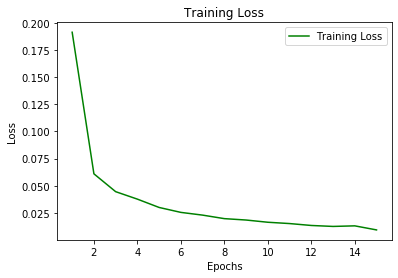

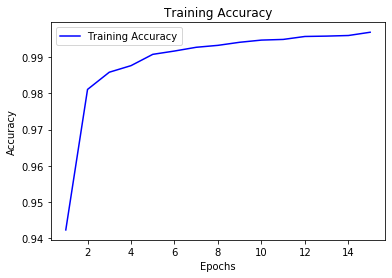

313/313 [==============================] - 2s 5ms/step - loss: 0.0263 - accuracy: 0.9928
Validation loss:  0.026343008503317833 
Validation Accuracy:  99.27999973297119 %
Test loss: 0.026343008503317833
Test accuracy: 0.9927999973297119


In [6]:
main()